# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [140]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [141]:
n = int(64/4)
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

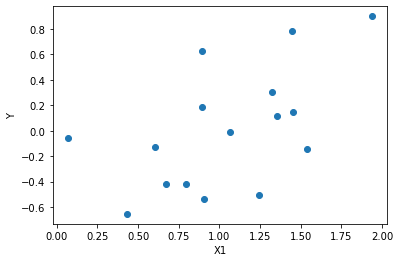

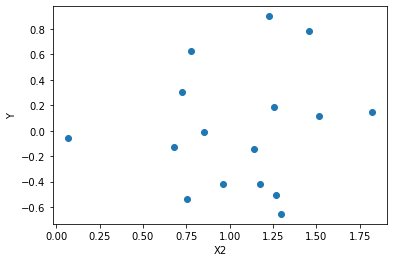

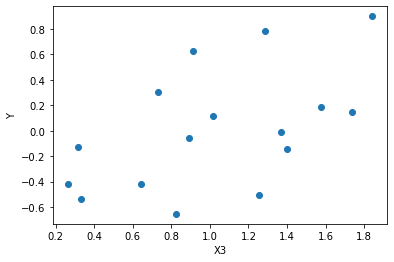

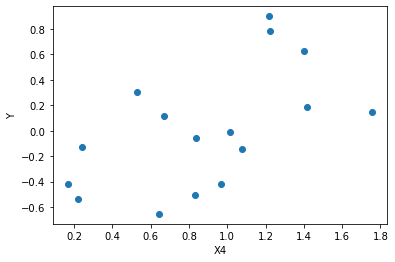

In [142]:
for i in range(4):
    plt.figure()
    plt.scatter(x.T[i], y)
    plt.xlabel('X' + str(i + 1))
    plt.ylabel('Y')

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

Equation:
# $\beta = (X^T X)^{-1} Y^T X$

In [143]:
left = np.linalg.inv(np.dot(x.T, x))

In [144]:
right = np.dot(y.T, x)

In [145]:
beta = np.dot(left, right)
beta

array([ 0.73701072, -0.57831257, -0.27272499,  0.74885631, -0.52530813])

In [146]:
Yp = np.dot(x, beta)
print(Yp)
y_array = np.vstack((y, Yp))

[-0.13031806 -0.22177323 -0.53273331 -0.3793981  -0.06978563 -0.69800208
  0.22901828 -0.06395645 -0.18284017  0.37176553  0.15182614  0.48191591
  0.03790747  0.33503764  0.26092716  0.60463993]


## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

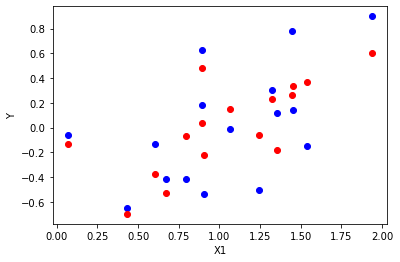

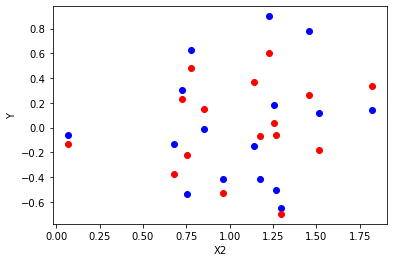

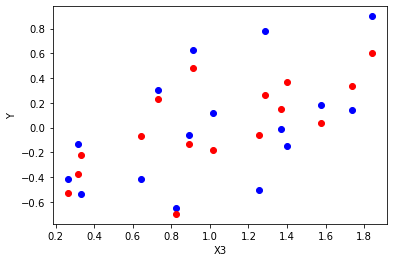

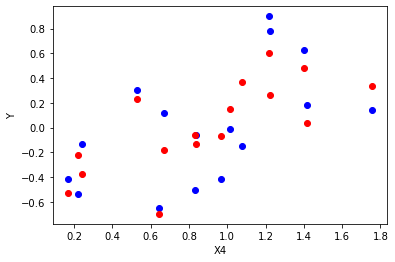

In [147]:
for i in range(4):
    plt.figure()
    plt.scatter(x.T[i], y_array[0], c = 'b')
    plt.scatter(x.T[i], y_array[1], c = 'red')
    plt.xlabel('X' + str(i + 1))
    plt.ylabel('Y')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [148]:
import pandas as pd
import numpy as np
credit = pd.read_csv('C:/Users/17036/Desktop/mlnn/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [149]:
columns = ['Income', 'Limit', 'Age', 'Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 9.66000e+02, 1.00000e+00]])

In [150]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [151]:
left = np.linalg.inv(np.dot(X.T, X))

In [152]:
right = np.dot(y.T, X)

In [153]:
beta = np.dot(left, right)

In [154]:
Yp = np.dot(X, beta)
y_array = np.vstack((y, Yp))

In [155]:
for i, name in enumerate(columns):
    print('The coefficient on ' + name + ' is: ' + str(beta[i]))
print('The coefficient on B0' + ' is: ' + str(beta[-1]))

The coefficient on Income is: 0.1318805125184781
The coefficient on Limit is: 0.06262537998887385
The coefficient on Age is: 0.031938146756488095
The coefficient on Balance is: 0.01502449352359747
The coefficient on B0 is: 42.81688201113593


### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

C:\Users\17036\AppData\Local\Temp/ipykernel_5600/2698309883.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['b', 'r'], labels = ['Measured', 'Predicted'])


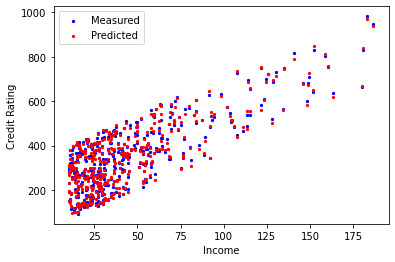

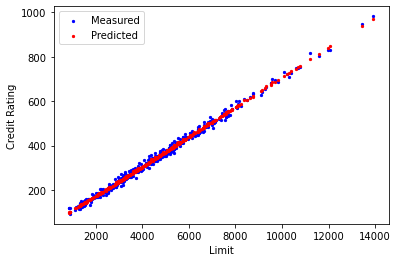

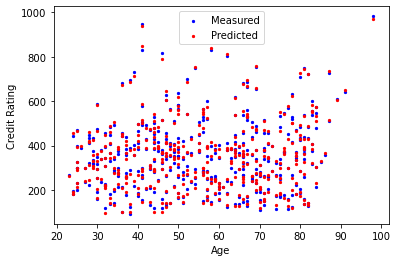

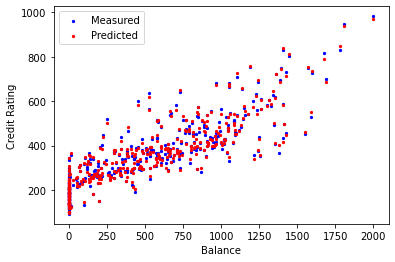

In [156]:
for i in range(len(columns)):
    plt.figure()
    plt.scatter(X.T[i], y_array[0], c = 'b', s = 5)
    plt.scatter(X.T[i], y_array[1], c = 'red', s = 5)
    plt.xlabel(columns[i])
    plt.ylabel('Credit Rating')
    plt.legend(['b', 'r'], labels = ['Measured', 'Predicted'])